# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

# Reading the csv file

In [2]:
df = pd.read_csv(r'news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [3]:
df.head(5)

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [4]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

# Distrubution of types of articles

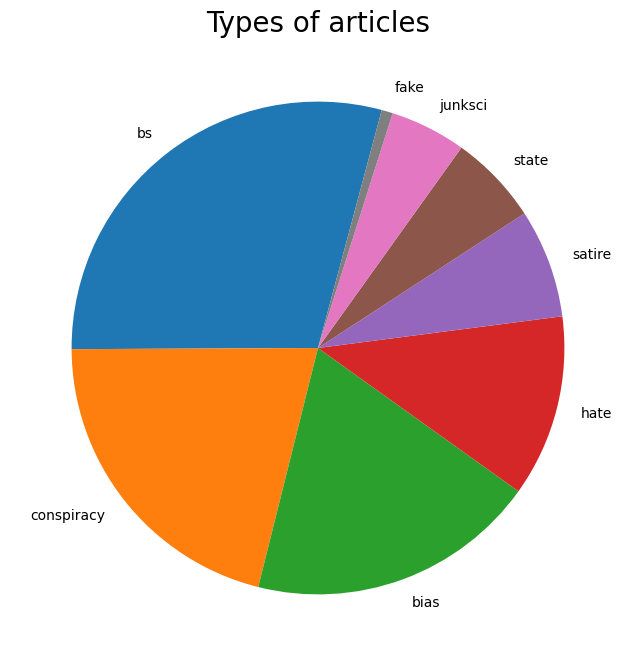

In [6]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

# Unigrams and bigrams 

In [7]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams used in articles',color='blue')

In [9]:
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used in articles', color='blue')

# WordCloud of articles

# Articles including images vs Label

In [11]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [12]:
def convert(path):
    return '<img src="'+ path + '" width="80">'

In [13]:
df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)

In [14]:
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,


In [15]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
No Author,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,
Mike Rivero,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,


In [16]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [17]:
type_label = {'Real': 0, 'Fake': 1}
df_sources.label = [type_label[item] for item in df_sources.label] 

In [18]:
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

> # Websites publishing real news

In [19]:
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"{y_}Websites publishing real news:{g_}{uniqueValues_real}\n") 

Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']



# Websites publishing fake news

In [20]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"{y_}Websites publishing fake news:{r_}{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com',

# Websites publishing both real and fake news

In [21]:
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"{y_}Websites publishing both real and fake news:{m_}{real_set & fake_set}\n")

Websites publishing both real and fake news:{'westernjournalism.com', 'washingtonsblog.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'newstarget.com', 'frontpagemag.com', 'presstv.ir', 'returnofkings.com', 'prisonplanet.com'}



In [22]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [23]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

# Label vs Type

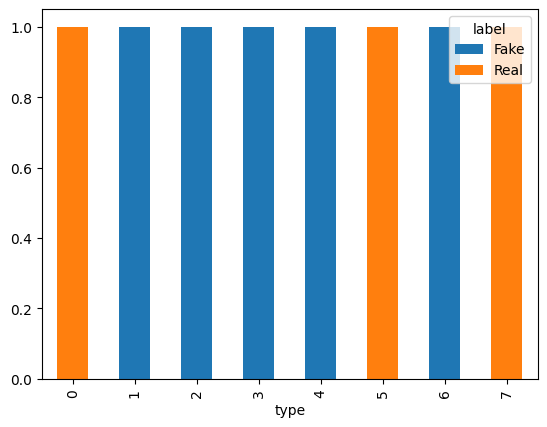

In [24]:
plot_bar(df,'type' , 'label')
plt.show()

In [25]:
fig = px.sunburst(df, path=['label', 'type'])
fig.show()

# Websites and types of news published

In [26]:
df_type = df[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]
{'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)

In [27]:
uv_bias = list(OrderedDict.fromkeys(val_bias)) 
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy)) 
uv_fake = list(OrderedDict.fromkeys(val_fake1)) 
uv_bs = list(OrderedDict.fromkeys(val_bs)) 
uv_satire = list(OrderedDict.fromkeys(val_satire)) 
uv_hate = list(OrderedDict.fromkeys(val_hate)) 
uv_junksci = list(OrderedDict.fromkeys(val_junksci)) 
uv_state = list(OrderedDict.fromkeys(val_state)) 

print(f"{b_}{type1}\n")
i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state): 
    print(f"{y_}Source URLs for type:{b_}{i}{r_}{lst}\n") 
    i+=1

{'bias': 0, 'conspiracy': 1, 'fake': 2, 'bs': 3, 'satire': 4, 'hate': 5, 'junksci': 6, 'state': 7}

Source URLs for type:0['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'newstarget.com', 'politicususa.com', 'prisonplanet.com', 'proudemocrat.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']

Source URLs for type:1['21stcenturywire.com', 'activistpost.com', 'awdnews.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com']

Source URLs for type:2['abcnews.com.co', 'adobochronicles.com']

Source URLs for type:3['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.co

# Shuffling values

In [28]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Lloyd Billingsley,2016-11-02T06:45:42.828+02:00,hillarymediamolecon,the hostility and hypocrisy of leftwing israel...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,5,Real,netanyahus critical foreign tour,black voters turning hillary november black vo...,1.0
Corbett,2016-11-16T20:59:47.037+02:00,notmypresident draintheswamp the real revoluti...,podcast play in new window download embed \n...,english,corbettreport.com,No Image URL,3,Fake,notmypresident draintheswamp real revolution a...,podcast play new window download embed helpful...,0.0
No Author,2016-10-26T23:00:16.777+03:00,us undermining daesh fight to get footing in s...,politics us democratic presidential nominee hi...,english,presstv.ir,http://media.presstv.com/photo/20161026/d25a11...,7,Real,secret talks mozambique opposition eu mediator...,interviews us first lady michelle obama l list...,1.0
David Stockman,2016-10-27T23:17:33.552+03:00,chart of the day what escape velocity core cap...,pomegranate pistachio pancakes \na glutenfree ...,english,davidstockmanscontracorner.com,http://static4.businessinsider.com/image/5810c...,6,Fake,geniuses schizophrenics pass question quiz dav...,posted october michael depinto anyone heard ye...,1.0
Anonymous,2016-10-29T10:38:00.000+03:00,no title,united states marine field mcconnell plum cit...,english,abeldanger.net,No Image URL,3,Fake,title,united states marine field mcconnell plum city...,0.0


# Training and Testing

In [29]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

Right after preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized. 

In order to get a sparse matrix of TF/IDF values, the following steps are taken:
* Tokenization of texts
* Counting of the tokens and
* Transforming the raw tokens into TF/IDF values

The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used
as input to estimators/classifiers.

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)

tfidf_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect.get_feature_names_out())


In [34]:
tfidf_vect

TfidfVectorizer(stop_words='english')

In [35]:
tfidf_train.shape

(1431, 39572)

AdaBoost works in iterations with a base classifier to ensure accurate predictions of unusual observations.

It works in iterations and within each iteration, incorrect observations are given a higher probability for classification for the next iteration. 

The AdaBoost implemented here has a Decision Tree Classifier as the base classifier with a max depth of the tree being 10.

In [36]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



accuracy: 0.959


In [40]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred3))

# Confusion Matrix
print("\nConfusion Matrix:")

print(metrics.confusion_matrix(y_test, y_pred3))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.95      0.96      0.96       125
           2       1.00      0.70      0.82        10
           3       0.95      0.93      0.94       168
           4       0.96      1.00      0.98        43
           5       0.95      0.98      0.97        85
           6       0.96      0.96      0.96        45
           7       0.97      1.00      0.98        29

    accuracy                           0.96       614
   macro avg       0.96      0.94      0.95       614
weighted avg       0.96      0.96      0.96       614


Confusion Matrix:
[[108   0   0   0   0   0   0   1]
 [  1 120   0   3   0   0   1   0]
 [  0   0   7   3   0   0   0   0]
 [  1   5   0 156   1   4   1   0]
 [  0   0   0   0  43   0   0   0]
 [  0   1   0   1   0  83   0   0]
 [  0   0   0   1   1   0  43   0]
 [  0   0   0   0   0   0   0  29]]


In [37]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.814


In [39]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred1))

# Confusion Matrix
print("\nConfusion Matrix:")

print(metrics.confusion_matrix(y_test, y_pred1))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       109
           1       0.82      0.92      0.86       125
           2       0.00      0.00      0.00        10
           3       0.77      0.90      0.83       168
           4       0.82      0.72      0.77        43
           5       0.95      0.81      0.87        85
           6       1.00      0.20      0.33        45
           7       1.00      0.93      0.96        29

    accuracy                           0.81       614
   macro avg       0.76      0.67      0.68       614
weighted avg       0.82      0.81      0.79       614


Confusion Matrix:
[[ 97   3   0   9   0   0   0   0]
 [  3 115   0   5   0   2   0   0]
 [  1   3   0   6   0   0   0   0]
 [  9   5   0 152   1   1   0   0]
 [  4   3   0   5  31   0   0   0]
 [  1   7   0   8   0  69   0   0]
 [ 14   4   0  11   6   1   9   0]
 [  0   1   0   1   0   0   0  27]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [77]:
new_article = ["This is a sample of a news article you want to test."]
new_article_tfidf = tfidf_vect.transform(new_article)
prediction = Adab.predict(new_article_tfidf)

prediction

array([3], dtype=int64)